# Week2　授業前課題2　ダミーデータの作成  
機械学習に関するプログラムの実験を行う上で、実データではないランダムなデータ（ダミーデータ）が欲しいということがあります。正規分布に従う乱数によるダミーデータの作成を通じてNumPyの使い方になれていきましょう。


散布図で描くと次のようになるデータを作っていきます。

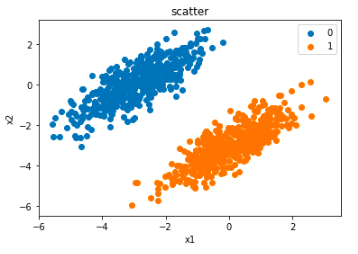

### 【問題1】乱数の作成  
平均が(-3, 0)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。
$$
\begin{pmatrix}
1.0 & 0.8 \\
0.8 & 1.0
\end{pmatrix}
$$
多次元の正規分布による乱数は``np.random.multivariate_normal()``を使うことで作成できます。

作成したndarrayのshapeは(500, 2)になります。

In [71]:
# 2次元正規分布に従う乱数（x1,x2）を500個生成
from numpy.random import *
mu = [-3, 0]
sigma = [[1.0, 0.8], [0.8, 1.0]]
values_0 = multivariate_normal(mu, sigma, 500)
print("サイズ：{}".format(values_0.shape))

サイズ：(500, 2)


### 【問題2】散布図による可視化  
問題1で作成したデータ点を散布図により可視化してください。


散布図はmatplotlibのplt.scatter()を使うことで描けます。

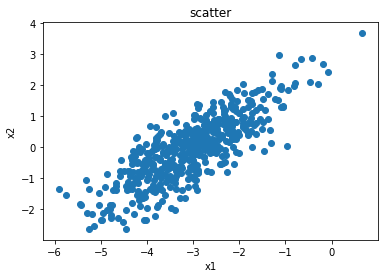

In [72]:
#1 x1, x2の散布図表示
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("scatter")
plt.scatter(values_0[:, 0], values_0[:, 1])
plt.show()

### 【問題3】ヒストグラムによる可視化  
問題1で作成したデータをヒストグラムにより可視化してください。
ヒストグラムはplt.hist()を使うことで描けます。

各次元ごとに作成し、2つのヒストグラムとしてください。
それぞれのヒストグラムの横軸の範囲はplt.xlim()を用いて揃えるようにしてください。

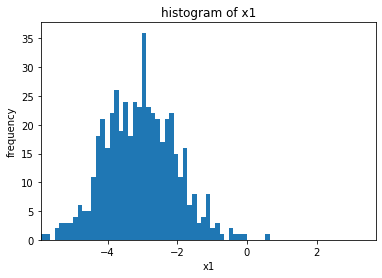

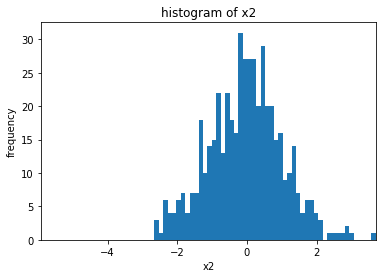

In [73]:
# 横軸の範囲を決める
left = min(values_0[:, 0])
right = max(values_0[:, 1])

# x1のヒストグラム表示
plt.xlabel("x1")
plt.xlim(left, right)
plt.ylabel("frequency")
plt.title("histogram of x1")
plt.hist(values_0[:, 0], bins=50)
plt.show()

# x2のヒストグラム表示
plt.xlabel("x2")
plt.xlim(left, right)
plt.ylabel("frequency")
plt.title("histogram of x2")
plt.hist(values_0[:, 1], bins=50)
plt.show()

### 【問題4】データの追加  
新たに平均が(0, -3)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。
$$
\begin{pmatrix}
1.0 & 0.8 \\
0.8 & 1.0
\end{pmatrix}
$$
そして、問題1、4それぞれのデータをひとつの散布図として可視化してください。凡例として問題1のものは0、問題2のものは1を表示してください。

In [74]:
# 2次元正規分布に従う乱数（x1,x2）を新たに500個生成
mu = [0, -3]
sigma = [[1.0, 0.8], [0.8, 1.0]]
values_1 = multivariate_normal(mu, sigma, 500)
print("サイズ：{}".format(values_1.shape))

サイズ：(500, 2)


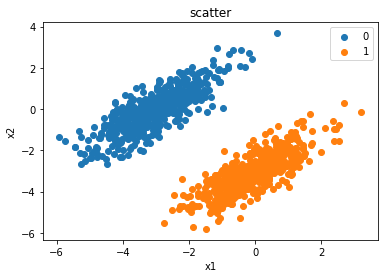

In [75]:
# 横軸、縦軸の範囲を決める
upper = max(values_0[:, 1])
lower = min(values_1[:, 1])
left = min(values_0[:, 0])
right = max(values_1[:, 0])

#1 x1, x2の散布図を合わせて表示
plt.xlabel("x1")
plt.xlim(left-0.5, right+0.5)
plt.ylabel("x2")
plt.ylim(lower-0.5, upper+0.5)
plt.title("scatter")
plt.scatter(values_0[:, 0], values_0[:, 1], label='0')
plt.scatter(values_1[:, 0], values_1[:, 1], label='1')
plt.legend()
plt.show()

### 【問題6】ラベル付け  
ひとまとめになった1000個のデータそれぞれに対して、問題1、4どちらで作成したものなのかを示す ラベル 付けを行ってください。問題1のものには``0``、問題4のものには``1``を対応させます。

0と1を含むラベルの列を新たに追加し、(1000, 3)のndarrayを作成してください。

機械学習に使用するデータセットはこのような形になっていることが多いです。

In [76]:
# ラベルを追加
values_0_labeled = np.append(values_0, np.zeros([500, 1]), axis=1)
values_1_labeled = np.append(values_1, np.ones([500, 1]), axis=1)  
# データの統合
values_labeled = np.append(values_0_labeled, values_1_labeled, axis=0)
print("サイズ：{}".format(values_labeled.shape))
print(values_labeled)

サイズ：(1000, 3)
[[-3.6303006  -0.20043743  0.        ]
 [-3.38786088 -0.0224001   0.        ]
 [-2.23080441  0.17744071  0.        ]
 ...
 [-1.07460887 -3.93351314  1.        ]
 [ 1.22906677 -1.86208914  1.        ]
 [-0.58485668 -3.17190888  1.        ]]
